###Exploration: Empirical CDF, Inverse Transform Sampling and the Newsvendor Inventory Model



In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt;plt.style.use('seaborn')
%matplotlib inline

Suppose we have at our disposal a random sample of observations X with an unknown distribution.


**Question 1: Can we obtain a cumulative distribution function based on this random sample?**

**Question 2: Can we obtain the inverted CDF of such a cdf in question 1 that we can use to obtain a new random sample with the same unknown distribution (inverse-transform sampling)?**


For this simple Python Implementation I use X ~ Exp(λ=0.5) with 200 samples but in fact we can use any random sample we want to answer both of the questions above. The cdf of the exponential distribution is easily invertible and hence it will be easy to evaluate results that follow.

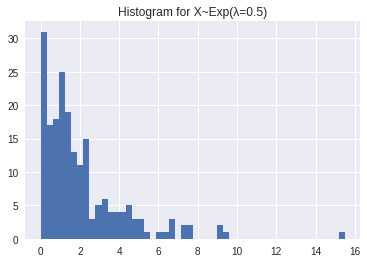

In [13]:
N=200
x=np.random.exponential(1/0.5,N)
plt.hist(x,bins=50);plt.title("Histogram for X~Exp(λ=0.5)");plt.show()

**Empirical CDF is Defined**:
<br>

F(x) = $\sum_{i=1}^{n}I_{x>i}$ / n

where n = size of sample 

(definition taken from Larry Wasserman All of Statistics page 97)

<br>

**Inverse Empirical CDF**

$F^{−1} : [0, 1] → \mathbf{R}$

$F^{-1}(u)$ = min$\{x:u\in\mathbb[0,1]\text{ and }F(x) \ge u\} $

note the added complexity that unlike our gamma distribution cdf, the empirical cdf may not be strictly monotone and hence the minimum are used to address this. (cdf's must be weakly monotone and right continuous)

The **formal definition uses infimum** instead of minimum but for our practical purposes this will suffice.

In [14]:
F=lambda m:sum([1 if i < m else 0 for i in x])/N
def F_inv(u,F):
  l=[]
  for x in np.linspace(0,15,300):
    if F(x)>=u:
      l.append(x)
  if len(l) !=0: # the reason for this is that F tends to 1 as x tends to infinity
    return min(l)  # so if we insert a number very close to 1 then inverse_F should return a "very large" number
  else:
    return 15  # in this case I chose 15 as such a "large number"

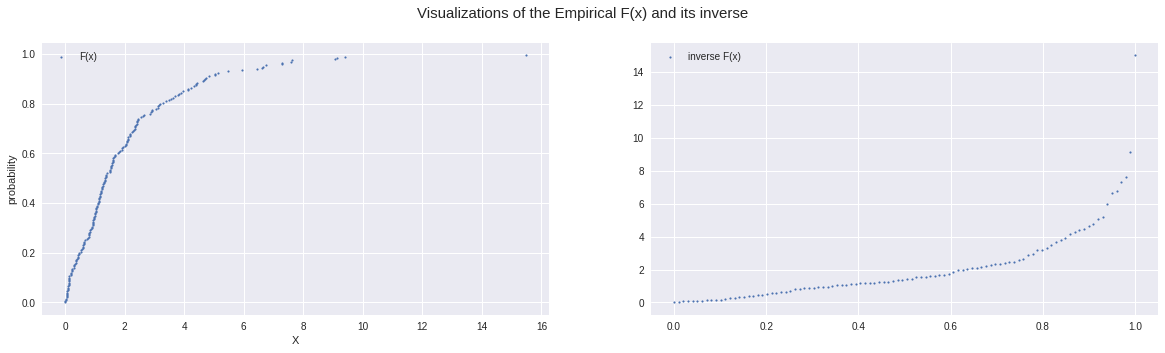

In [15]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
plt.suptitle("Visualizations of the Empirical F(x) and its inverse",fontsize=15)
ax[0].scatter(x,[F(x) for x in x],label="F(x)",s=3)
ax[0].legend();ax[0].set_ylabel("probability");ax[0].set_xlabel("X")
u=np.linspace(0,1,100)
ax[1].scatter(u,[F_inv(i,F) for i in u],label="inverse F(x)",s=3);ax[1].legend()
plt.show()

Sanity Check!! But how do the above correspond to the actual Exp(λ=0.5) cdf that we know X came from?

Recall the Exponential distribution is characterized by the cdf.

<br>

$ F_{X}(x;\lambda) = \begin{cases}
\  1-e^{ - \lambda x} & x \ge 0, \\
0 & x < 0.
\end{cases}$

<br>


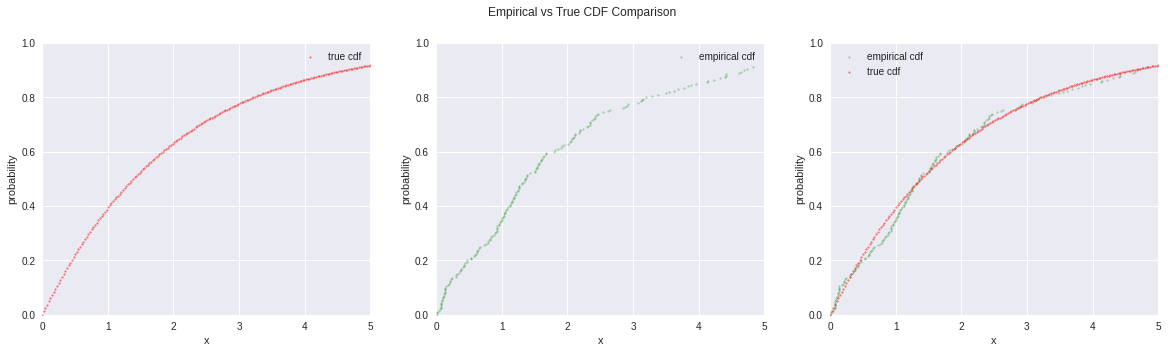

In [16]:
cdf = lambda x: 1-np.e**(-0.5*x)
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(20,5))
xaxis=np.linspace(0,5,N)
emp_cdf_y=[F(x) for x in x]
ax[0].scatter(xaxis,[cdf(i) for i in xaxis],label="true cdf",alpha=0.5,s=3,color='red')
ax[1].scatter(x,emp_cdf_y,label="empirical cdf",alpha=0.3,s=3,color='green')
ax[2].scatter(x,emp_cdf_y,label="empirical cdf",alpha=0.3,s=3,color='green')
ax[2].scatter(xaxis,[cdf(i) for i in xaxis],label="true cdf",alpha=0.5,s=3,color='red')
[(ax[i].set_xlim(0,5),ax[i].set_ylim(0,1),ax[i].legend(),ax[i].set_xlabel("x"),ax[i].set_ylabel('probability')) for i in [0,1,2]]
plt.suptitle("Empirical vs True CDF Comparison")
plt.show()

from the above we can observe that even with 200 data points in this case the empirical cdf that we have obtained very closely matches the true cdf 

<br>

but what about the inverse cdf? how does our inverse cdf compare to the true inverse cdf given that we know the distribution where the random sample came from?

<br>

for $x\ge 0$ we can rearrange the cdf definition to obtain: $x = \frac{ln(1-F(x)}{-λ}$ which in our case will become $x = F^{-1}(u)=-2*ln(1-u)$ 

<br>

We can generate a sample of observations $~ Uniform(0,1)$ via inverse transform sampling using $F^{-1}(u)$. 

<br>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


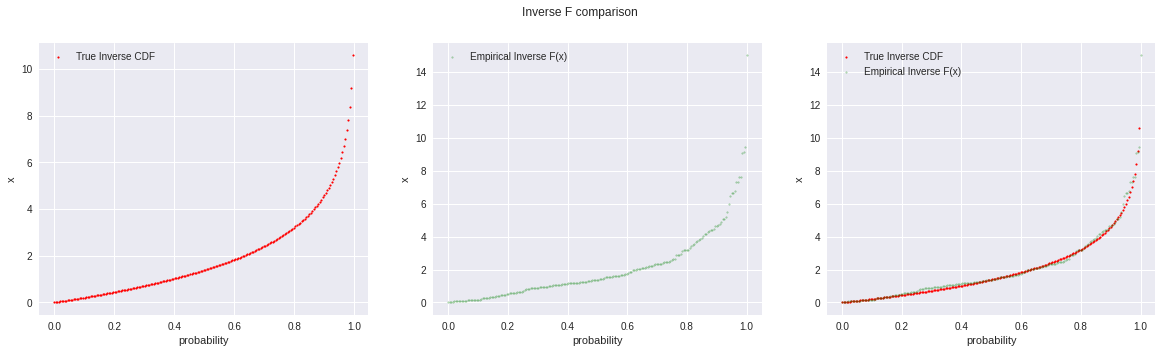

In [17]:
true_F_inv = lambda u: -2*np.log(1-u)
u=np.linspace(0,1,N)
true=[true_F_inv(i) for i in u]
emp=[F_inv(i,F) for i in u]
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(20,5))
ax[0].scatter(u,true,label='True Inverse CDF',s=3,color='red')
ax[1].scatter(u,emp,label="Empirical Inverse F(x)",alpha=0.3,s=3,color='green')
ax[2].scatter(u,true,label='True Inverse CDF',s=3,color='red')
ax[2].scatter(u,emp,label="Empirical Inverse F(x)",alpha=0.3,s=3,color='green')
[(ax[i].legend(),ax[i].set_xlabel("probability"),ax[i].set_ylabel("x")) for i in [0,1,2]]
plt.suptitle("Inverse F comparison")
plt.show()

As can be observed above - the inverse cdf we obtain via inverse transform sampling is very close to the true cdf.

Where could we use the concepts described above?? 

Newsvendor model is one example. The model is an inventory model that simulates a one-period decision. The newsvendor needs to decide how many newspapers to print or order in advance. If he prints too few, then he may lose potential sales but if he prints too many, some may not be sold and would have to be destroyed. (these concepts are referred to as cost of underage and overage respectively) 

<br> 

The newsvendor thus wants to choose q = number of newspapers to print in advance to maximize his profit $p*min(S,q)-q*c-FC$ 

## Newsvendor Model 

<br>

The Newsvendor model assume Sales = S ~ Normal (mu, sigma^2). 

<br>

We maximizing expected profit the single period optimal order quantity $q^{*}$.

<br>

Expected Profit = $E(p*min(S,q)-q*c-FC)$ 

<br>

where p = price for the newspaper, c= variable cost per unit, FC=fixed cost


<br>

$I(q)$ = $p\int_{-\infty}^{\infty} min(v,q) dv - q*c - FC =  p\int_{-\infty}^{q} vdv -p\int_{q}^{\infty}qdv- q*c - FC $

<br>

$\frac{dI}{dq}=p*q*f(q) +p(1-F(q))-p*q*f(q) - c$ where f is the pdf of r.v. S

<br>

set $\frac{dI}{dq}=0$ to obtain F(X $\ge q^{*})$  = $\frac{(p - c)}{p}$ 

<br>

$\frac{\partial^2 I}{\partial q^2} = -p*f(q) <0 $ hence I(q) is convex so $q^{*}$ maximizes our expected profit $I(q)$

<br>

if S is normally distributed this translates to $q^{*} = Φ^{-1}(\frac{p-c}{p})$

<br>

**but what if S is not normally distributed?**

<br>

**in this case we can use our inverse empirical cdf described above in order to find the optimal order quantity q to help the newsvendor!**